# K Means Clustering for Customer Segmentation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

C:\Users\Anshu Pandey\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# loaddataset
df = pd.read_excel("datasets-1/Wholesale customers data.xlsx")
df.shape

(440, 8)

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# check for missing values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
# check for outliers
df.skew(numeric_only=True)

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

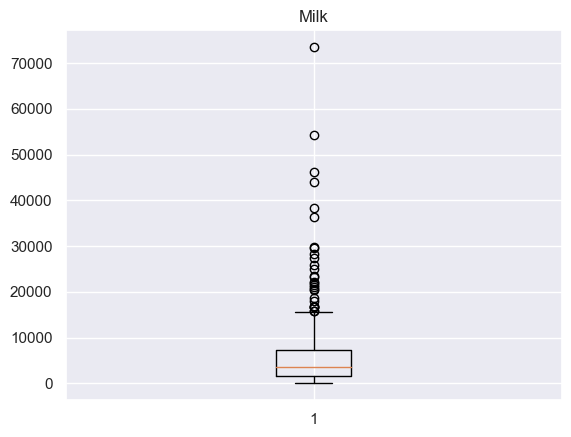

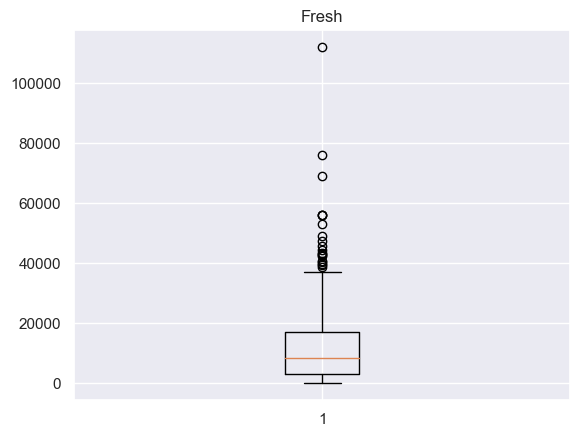

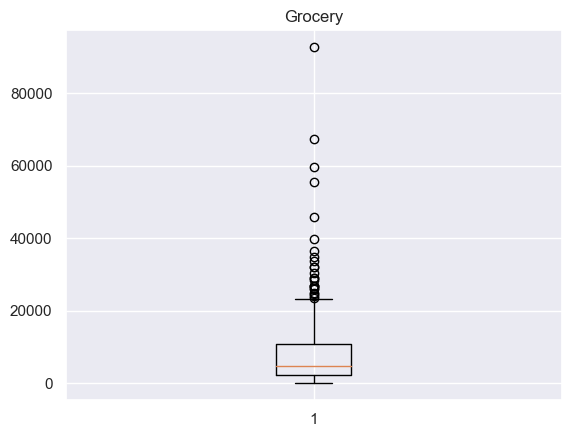

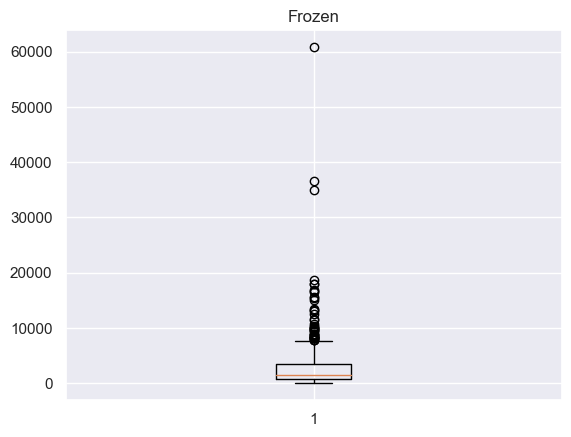

In [8]:
for col in ['Milk',"Fresh","Grocery","Frozen"]:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [9]:
for col in ['Milk',"Fresh","Grocery","Frozen"]:
    print(f"For column {col} Before clipping, the skewness is {df[col].skew()}")
    thresh = df[col].quantile(0.95)
    df[col][df[col]>thresh] = df[col][df[col]<thresh].max()
    print(f"For column {col} After clipping, the skewness is {df[col].skew()}")
    print("*******"*20)

For column Milk Before clipping, the skewness is 4.053754849210881
For column Milk After clipping, the skewness is 1.2134320076969771
********************************************************************************************************************************************
For column Fresh Before clipping, the skewness is 2.561322751927935
For column Fresh After clipping, the skewness is 1.0778027940246893
********************************************************************************************************************************************
For column Grocery Before clipping, the skewness is 3.5874286903915453
For column Grocery After clipping, the skewness is 1.2125072345269448
********************************************************************************************************************************************
For column Frozen Before clipping, the skewness is 5.9079856924559575
For column Frozen After clipping, the skewness is 1.4196468621648108
***************************

C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_33784\410730983.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][df[col]>thresh] = df[col][df[col]<thresh].max()
C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_33784\410730983

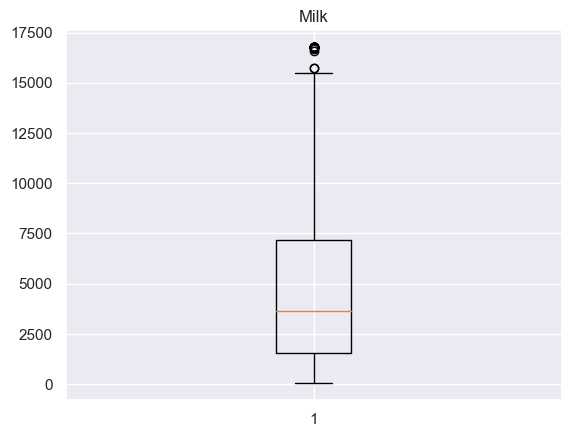

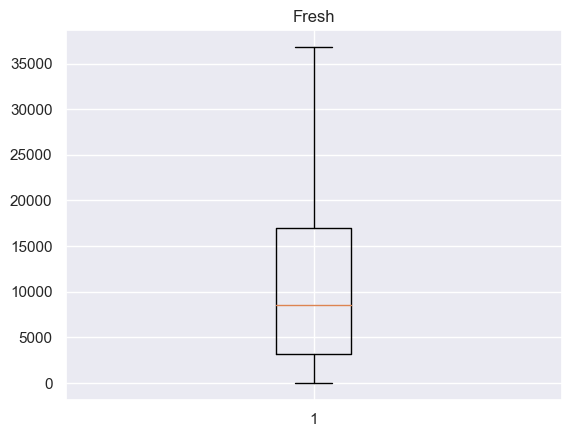

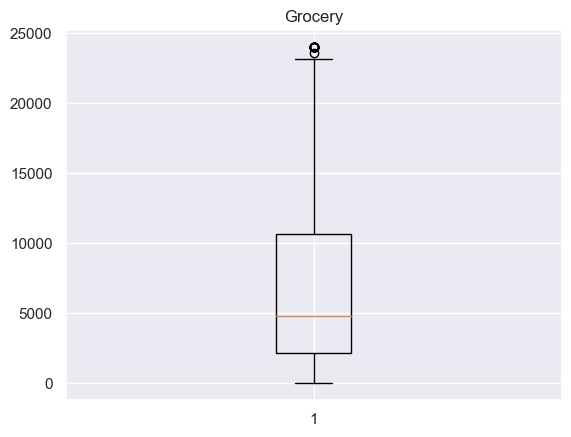

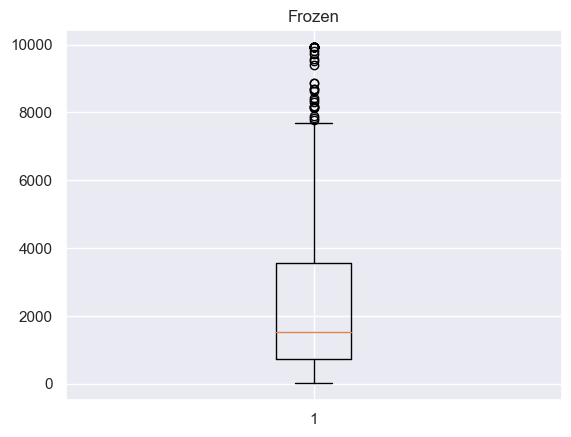

In [10]:
for col in ['Milk',"Fresh","Grocery","Frozen"]:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

## Applying Clustering

In [22]:
df2 = df[['Fresh','Milk']]

from sklearn.preprocessing import StandardScaler

for col in df2.columns:
    df2[col] = StandardScaler().fit_transform(df2[[col]])

from sklearn.cluster import KMeans

model = KMeans(n_clusters=3,random_state=5,verbose=True)
model.fit(df2)

C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_33784\3635479770.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = StandardScaler().fit_transform(df2[[col]])
C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_33784\3635479770.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = StandardScaler().fit_transform(df2[[col]])
C:\Users\Anshu Pandey\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 

Initialization complete
Iteration 0, inertia 663.8997867011792.
Iteration 1, inertia 316.3249969466117.
Iteration 2, inertia 310.97208182534234.
Iteration 3, inertia 310.384720210684.
Iteration 4, inertia 310.3419774263775.
Iteration 5, inertia 310.3245319261975.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 434.0209573458347.
Iteration 1, inertia 322.76258745285793.
Iteration 2, inertia 313.94691930475005.
Iteration 3, inertia 311.15076253525416.
Iteration 4, inertia 310.657772975729.
Iteration 5, inertia 310.325740188456.
Iteration 6, inertia 310.2876978383289.
Iteration 7, inertia 310.25989934359706.
Iteration 8, inertia 310.2174421679416.
Iteration 9, inertia 310.1929158711387.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 378.0552058454658.
Iteration 1, inertia 318.0577473277068.
Iteration 2, inertia 313.5731307000906.
Iteration 3, inertia 313.06821984325364.
Iteration 4, inertia 312.97741920

KMeans(n_clusters=3, random_state=5, verbose=True)

In [23]:
df2['cluster'] = model.labels_
df2.head()

C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_33784\1297956353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cluster'] = model.labels_


,Fresh,Milk,cluster
0,0.133580,0.999773,1
1,-0.421911,1.033667,1
2,-0.491595,0.813133,1
3,0.192574,-0.862225,0
4,1.118062,0.065252,2


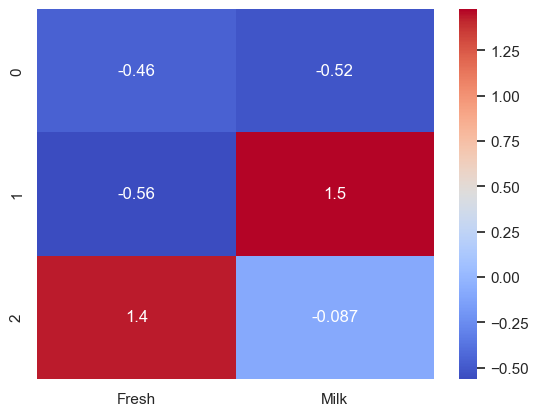

In [24]:
centers = pd.DataFrame(model.cluster_centers_,columns=['Fresh','Milk'])

sns.heatmap(centers,annot=True,cmap='coolwarm')
plt.show()

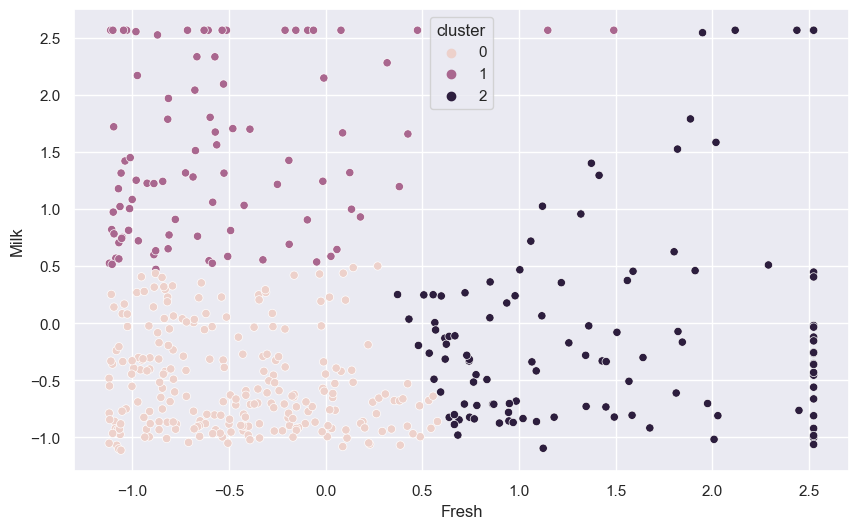

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2,x='Fresh',y='Milk',hue='cluster')
plt.show()

In [27]:
np.random.randint(10,100,5)

array([54, 10, 16, 95, 27])

In [28]:
np.random.randint(10,100,5)

array([97, 83, 47, 85, 41])

In [29]:
np.random.seed(5)
np.random.randint(10,100,5)

array([88, 71, 26, 83, 18])

In [30]:
np.random.seed(5)
np.random.randint(10,100,5)

array([88, 71, 26, 83, 18])